# Keyword Etraction:
<b>spaCy: Industrial-strength NLP
spaCy is a library for advanced Natural Language Processing in Python and Cython. It's built on the very latest research, and was designed from day one to be used in real products.

spaCy comes with pretrained pipelines and currently supports tokenization and training for 60+ languages. It features state-of-the-art speed and neural network models for tagging, parsing, named entity recognition, text classification and more, multi-task learning with pretrained transformers like BERT, as well as a production-ready training system and easy model packaging, deployment and workflow management. spaCy is commercial open-source software, released under the MIT license.

reference models to download and load using spacy library
https://allenai.github.io/scispacy/
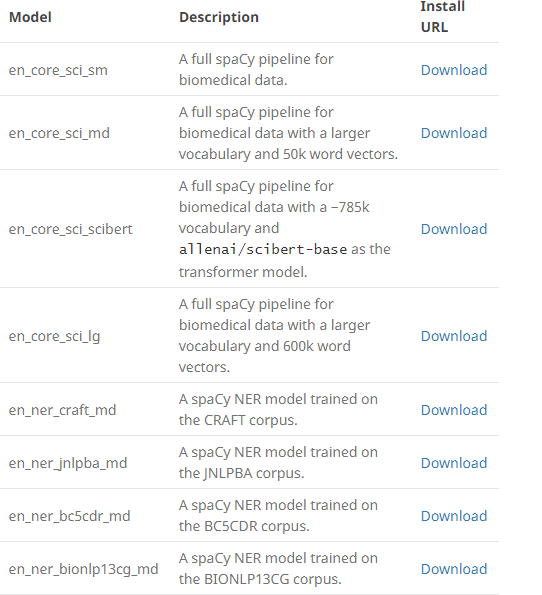<b>

In [1]:
#Download
 #pip install -U spacy
    
    
 #python -m spacy download en_core_web_sm
import spacy



In [2]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")


In [3]:
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

In [8]:
doc

When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously. “I can tell you very senior CEOs of major American car companies would shake my hand and turn away because I wasn’t worth talking to,” said Thrun, in an interview with Recode earlier this week.

<b>The output of doc.ents objects could be 1-gram, 2-gram, 3-gram, etc. You can’t control the extraction process based on n-gram and other parameters<b>

In [7]:
doc.ents

(Sebastian Thrun, Google, 2007, American, Thrun, earlier this week)

In [5]:

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'be', 'talk', 'say']


In [6]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun GPE
earlier this week DATE


# YAKE
<b>Yet Another Keyword Extractor (Yake) library selects the most important keywords using the text statistical features method from the article. With the help of YAKE, you can control the extracted keyword word count and other features.
Unsupervised Approach for Automatic Keyword Extraction using Text Features<b>

In [9]:
import yake
kw_extractor = yake.KeywordExtractor()
text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('programming languages Python', 0.001295347548560416)
('natural language processing', 0.002012136772192602)
('advanced natural language', 0.0026621455770583914)
('Python and Cython', 0.0035840985079775055)
('open-source software library', 0.008298152696966859)
('languages Python', 0.009390717577572831)
('language processing', 0.01453240965208459)
('software company Explosion', 0.015993140254256993)
('advanced natural', 0.01840251352140607)
('natural language', 0.019161829017826378)
('programming languages', 0.019161829017826378)
('open-source software', 0.032652195076937375)
('Ines Montani', 0.03375876229391358)
('Matthew Honnibal', 0.04096703831447956)
('Honnibal and Ines', 0.04096703831447956)
('Cython', 0.053691021027863564)
('software library', 0.05857047036380304)
('company Explosion', 0.06120870235178475)
('Python', 0.06651575167590484)
('library for advanced', 0.07441175006256819)


In [10]:
import yake
kw_extractor = yake.KeywordExtractor()
text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.1
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('programming languages Python', 0.001295347548560416)
('spaCy', 0.10241338875304772)
('developers', 0.35038366644254865)


<b>Rake-Nltk
You can form a powerful keyword extraction method by combining the Rapid Automatic Keyword Extraction (RAKE) algorithm with the NLTK toolkit.<b>

In [14]:
from rake_nltk import Rake
rake_nltk_var = Rake()

In [15]:
text = """spaCy is an open-source software library for advanced natural language processing,
written in the programming languages Python and Cython. The library is published under the MIT license
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)


['advanced natural language processing', 'software company explosion', 'programming languages python', 'source software library', 'mit license', 'matthew honnibal', 'main developers', 'ines montani', 'library', 'written', 'spacy', 'published', 'open', 'founders', 'cython']


<b>
Gensim is primarily developed for topic modeling. Over time, Gensim added other NLP tasks such as summarization, finding text similarity, etc. Here we will demonstrate the use of Genism for keyword extraction tasks<b>

In [ ]:
from gensim.summarization import keywords
text = """spaCy is an open-source software library for advanced natural language processing, 
written in the programming languages Python and Cython. The library is published under the MIT license 
and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
print(keywords(text))